# 모델 성능 향상하기

# 1.모델 하이퍼파라미터 튜닝
- 그리드 서치
- 랜덤 서치


## 1-1. 그리드 서치(Grid Search)
- 가능한 모든 하이퍼파라미터 값의 조합에 대해 모델 성능을 측정하고 비교하면서 최적의 하이퍼파라미터를 찾는 방식
- 모든 값을 탐색한다는 점에서 철저한 방식이지만 시간이 많이 소요되는 비효율적인 방법일 수 잇따.

## 1-2. Grid Search 실습(랜덤포레스트)
- GridSearchCV 객체 생성 인자
    - estimator 
    - param_grid : 튜닝하려는 하이퍼파라미터의 딕셔너리 지정
    - scoring : 모델 성능 평가하는 전략, 기본값은 accuracy
    - n_jobs : 병렬로 실행할 작업 수, -1: 모든 프로세서 사용, 기본값은 1
    - refit : 가장 최적의 값을 찾은 후 입력된 estimator 객체를 해당 하이퍼파라미터로 재학습시키는 것으로, 기본값은 True
    - cv : 교차 검증을 위한 fold 횟수

In [1]:
# 데이터 생성
from tensorflow.keras.datasets.mnist import load_data
from sklearn.ensemble import RandomForestClassifier

(x_train, y_train), (x_test, y_test) = load_data()

# 3차원의 이미지 행렬을 2차원으로 변경
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

In [2]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()

param_grid = {'max_depth' : [3, 5, 10, None],
              'n_estimators' : [1, 3, 5, 7],
              'min_samples_leaf' : [1, 2, 3],
              'min_samples_split' : [1, 2, 3]
              }

# 수행
gs_cv = GridSearchCV( estimator=estimator,
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=3
                     )

model = gs_cv.fit(X_train, y_train)

c:\Users\Eunjeong\Documents\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Eunjeong\Documents\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Eunjeong\Documents\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\Eunjeong\Documents\Anaconda\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints

In [3]:
# 최적의 파라미터 및 성능 확인
print(f'Best hyperparameters : {model.best_params_}')
print(f'Best score : {model.best_score_}')

Best hyperparameters : {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 7}
Best score : 0.9324333333333334


In [4]:
# 시험 테스트 및 성능 확인
clf = model.best_estimator_
clf.fit(X_train, y_train)
print(f'test score : {clf.score(X_test, y_test)}')

test score : 0.9408


## 1-3.랜덤서치(Random Search)
- 각 조합에 대해 훈련하고 점수를 매기는 대신 랜점 조합이 선택된다.
- 시간 및 리소스 제약에 따라 검색 반복 횟수를 설정할 수 있으며, 파라미터 탐색 범위가 넓거나 연속적인 값을 탐색해야 하는 경우에 효율적이다.

## 1-4.Random Search 실습(램덤 포레스트)
- RandomSearchCV 객체 생성 인자
    - estimator
    - n_iter : 파라미터 검색 횟수, 지정한 횟수만큼만 조합을 반복하며 평가, 기본값은 10 
    - param_distributions : 튜닝하려는 하이퍼파라미터의 딕셔너리 지정
    - scoring : 모델 성능 평가하는 전략, 기본값은 accuracy
    - n_jobs : 병렬로 실행할 작업 수, -1: 모든 프로세서 사용, 기본값은 1
    - refit : 가장 최적의 값을 찾은 후 입력된 estimator 객체를 해당 하이퍼파라미터로 재학습시키는 것으로, 기본값은 True
    - cv : 교차 검증을 위한 fold 횟수

In [5]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [6]:
estimator = RandomForestClassifier()

# 범위 지정
param_distributions = {'max_depth' : list(np.arange(3, 13, step=3))+[None],
                       'n_estimators' : np.arange(10, 320, step=100),
                       'max_features' : randint(1,7),
                       'criterion' : ['gini', 'entropy'],
                       'min_samples_leaf' : randint(1,4),
                       'min_samples_split' : np.arange(2, 8, step=2)
                       }

# 수행
rs_cv = RandomizedSearchCV( estimator= estimator,
                           param_distributions=param_distributions,
                           n_iter=10,
                           scoring='accuracy',
                           n_jobs=1,
                           refit=True,
                           cv=3)

model = rs_cv.fit(X_train, y_train)

In [7]:
# 최적의 파라미터 및 성능 확인
print(f'Best hyperparameters : {model.best_params_}')
print(f'Best score : {model.best_score_}')

Best hyperparameters : {'criterion': 'gini', 'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 110}
Best score : 0.9398833333333334


In [8]:
# 시험 테스트 및 성능 확인
clf = model.best_estimator_
clf.fit(X_train, y_train)
print(f'test score : {clf.score(X_test, y_test)}')

test score : 0.9454


# 2.머신러닝 모델링 및 하이퍼파라미터 튜닝 실습
- 항공권 가격 예측 데이터와 항공사 고객 만족 여부 데이터를 가지고 실습
- 데이터 출처 : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# 3.(회귀)항공권 가격 예측 모델 구현

### 3-1. 데이터 불러오기

In [9]:
import pandas as pd

cdf = pd.read_csv('./Flight_Price_Prediction/Clean_Dataset.csv', encoding='cp949')

# 5000건만 사용
cdf = cdf[:5000]

cdf.head(4)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955


### 3-2. 데이터 전처리

In [10]:
# Unnamed 컬럼 확인
cdf['Unnamed: 0'].value_counts().min()
cdf['Unnamed: 0'].value_counts().max()

# 인덱스이므로 삭제
cdf.drop('Unnamed: 0', axis=1, inplace=True)

# 결과 확인
cdf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
cdf.describe()
cdf.describe(include='all')

# 수치 데이터 : duration, day_left, price
# 문자형에 대한 정보 확인

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000
unique,6,222,1,6,3,6,1,1,NaN,NaN,NaN
top,Vistara,UK-819,Delhi,Evening,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,1496,90,5000,1391,3619,1702,5000,5000,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.665682,14.216800,7589.786600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.247512,7.109536,4476.362204
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,2409.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330000,8.000000,4678.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.670000,14.000000,5955.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.080000,20.000000,10549.000000


In [12]:
# null확인
cdf.info()

# null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
 10  price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [13]:
cdf.airline.value_counts()

# 6개의 항공사로 가격과 관련 있는지 바로 그래프를 통해 확인

Vistara      1496
Air_India    1311
Indigo        813
GO_FIRST      801
SpiceJet      296
AirAsia       283
Name: airline, dtype: int64

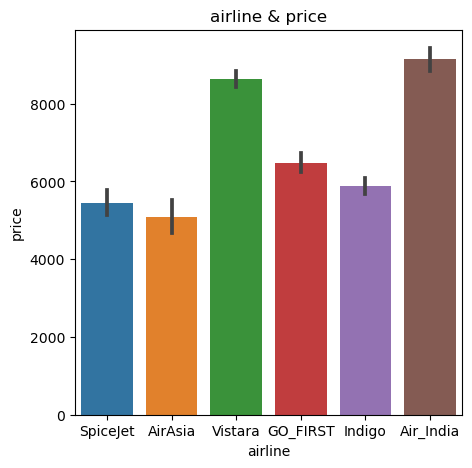

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))

ax = sns.barplot(x='airline', y='price', data=cdf)

ax.set(title='airline & price')
plt.show()

# 항공사별로 가격이 다름(Air_india > Vistara > GO_FIRST > Indigo > Spicejet > AirAsia)
# 항공사가 가격에 영향을 미치므로 해당 컬럼 유지

In [15]:
cdf.head(1)

cdf.flight.value_counts()
# 1. 3자리 코드와 4자리 코드는 유의미한 데이터인가?
    # 국내선과 국제선의 차이. 
# 2. 코드 패턴은 유의미한가?
    # 항공편명에 따른 코드 부여. 
# --> 항공평명(UK, AI ...)은 유의미하나 출발지, 도착지, 거리 등의 데이터가 있으므로 flight를 대체할 수 있다.

UK-819     90
UK-879     62
UK-899     61
UK-705     61
UK-835     60
           ..
AI-9939     2
I5-881      2
I5-744      1
SG-9974     1
SG-8339     1
Name: flight, Length: 222, dtype: int64

In [16]:
cdf.drop('flight', axis=1, inplace=True)
cdf.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
# 웟핫 인코딩
    # 범주형 데이터의 수치화, 수치값인데 문자형으로 저장된 것은 없는지, 수치형 변수 중 실제로 범주형이지만 수치형인 것은 없는지
cdf.info()

# --> 없음

# 실행하기
dummies_cdf = pd.get_dummies(cdf,
                             # 범주형 데이터만
                             columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
                                      'destination_city', 'class'],
                             drop_first=True #맨 첫번째 범주에 1000으로 하는 것이 아니라 0000을 부여해서 별도의 dummy variable을 부여하지 않고 다른 것들의 여집합으로 표시함
                             )

dummies_cdf.head()

print(dummies_cdf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   source_city       5000 non-null   object 
 2   departure_time    5000 non-null   object 
 3   stops             5000 non-null   object 
 4   arrival_time      5000 non-null   object 
 5   destination_city  5000 non-null   object 
 6   class             5000 non-null   object 
 7   duration          5000 non-null   float64
 8   days_left         5000 non-null   int64  
 9   price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 390.8+ KB
(5000, 20)


### 3-3. 학습 데이터 만들기

In [32]:
y = dummies_cdf.price
x = dummies_cdf.drop('price', axis=1)

print(x.shape, y.shape)

(5000, 19) (5000,)


### 3-4. 모델 생성 및 데이터 분할

In [33]:
# !pip install xgboost
# !pip install lightbgm


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split

In [35]:
# 7가지 모델로 학습

# 모델 생성
# n_jobs : 학습할 때 사용할 cpu개수(모든 cpu : -1)
# random_state : 동일한 학습을 위한 고정값
lr = LinearRegression(n_jobs=-1)
dtr = DecisionTreeRegressor( random_state=1)
rfr = RandomForestRegressor( random_state=1)
gbr = GradientBoostingRegressor( random_state=1)
xgbr = XGBRFRegressor(n_jobs=-1, random_state=1)
etr = ExtraTreesRegressor(n_jobs=-1, random_state=1)
lgbmr = LGBMRegressor(n_jobs=-1, random_state=1)

In [36]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3500, 19) (3500,)
(1500, 19) (1500,)


### 3-5. 모델 학습

In [37]:
lr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
xgbr.fit(x_train, y_train)
etr.fit(x_train, y_train)
lgbmr.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 18
[LightGBM] [Info] Start training from score 7548.349714


LGBMRegressor(n_jobs=-1, random_state=1)

### 3-6. 성능 비교

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

models = [lr, dtr, rfr, gbr, xgbr, etr, lgbmr]
r2_list = []
rmse_list = []

for model in models:
    pred = model.predict(x_test)
    r2_list.append( round(r2_score(y_test, pred), 5) )
    rmse_list.append( round(mean_squared_error(y_test, pred, squared=False) , 5) )
    
r2_score_df = pd.DataFrame( [r2_list, rmse_list],
                            columns=['lr', 'dtr', 'rfr', 'gbr', 'xgbr', 'etr', 'lgbmr'],
                            index = ['r2', 'rmse'])

r2_score_df.head()

,lr,dtr,rfr,gbr,xgbr,etr,lgbmr
r2,0.61523,0.70927,0.79828,0.76376,0.73031,0.74807,0.79957
rmse,2818.92861,2450.35112,2041.08811,2208.84675,2360.00532,2280.97506,2034.53417


In [44]:
# -> lgbmr이 가장 성능이 높으므로 이 모델을 기반으로 성능 개선

### 3-7. 최적을 하이퍼파라미터 찾기(GridSearch)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
%%time

param_grid = {
    'learning_rate': [0.1, 0.01, 0.003],
    'colsample_bytree' : [0.5, 0.7],
    'max_depth' : [20, 30, 40]    
}

# 최적의 값 검색
cv_lgbmr = GridSearchCV(estimator=lgbmr,
                        param_grid=param_grid,
                        cv=5, 
                        verbose=1)

cv_lgbmr.fit(x_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 18
[LightGBM] [Info] Start training from score 7601.929643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

GridSearchCV(cv=5, estimator=LGBMRegressor(n_jobs=-1, random_state=1),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.1, 0.01, 0.003],
                         'max_depth': [20, 30, 40]},
             verbose=1)

In [64]:
#최적의 조합
print(cv_lgbmr.best_params_)
print(cv_lgbmr.best_score_)


{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 30}
0.803203388259023


In [65]:
# 머신러닝 모델 검증
# 최적의 하이퍼파라미터로 재학습
best_lgbmr = LGBMRegressor(max_depth=30,
                           colsample_bytree=0.7,
                           learning_rate=0.1,
                           n_jobs=-1,
                           random_state=1)

best_lgbmr.fit(x_train, y_train)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 18
[LightGBM] [Info] Start training from score 7548.349714


LGBMRegressor(colsample_bytree=0.7, max_depth=30, n_jobs=-1, random_state=1)

### 3-8. 성능 확인 및 비교

In [66]:
# 모델 성능
best_pred = best_lgbmr.predict(x_test)
print('r2 : ', round(r2_score(y_test, best_pred), 5) )
print('rmse : ', round(mean_squared_error(y_test, best_pred, squared=False), 5) )


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
r2 :  0.80154
rmse :  2024.49371


In [ ]:
# -> R2 : 0.79957 / RMSE : 2034.53417 에서 R2 : 0.80154 / RMSE : 2024.49371 으로 성능이 향상됨.

### 3-9. Random Search 사용

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
%%time

param_dists = {
    'learning_rate': [0.1, 0.01, 0.003],
    'colsample_bytree' : [0.5, 0.7],
    'max_depth' : [20, 30, 40]    
}

# 최적의 값 검색
cv_lgbmr = RandomizedSearchCV(estimator=lgbmr,
                        param_distributions=param_dists,
                        n_iter = 500,
                        cv=5, 
                        verbose=1)

cv_lgbmr.fit(x_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 18
[LightGBM] [Info] Start training from score 7601.929643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(n_jobs=-1, random_state=1),
                   n_iter=500,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.1, 0.01, 0.003],
                                        'max_depth': [20, 30, 40]},
                   verbose=1)

In [61]:
# 성능 확인
print(cv_lgbmr.best_params_)
print(cv_lgbmr.best_score_)

{'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
0.803203388259023


# 4.(분류)항공사 고객만족 여부 예측 모델링
- 데이터 출처 : https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

### 4-1.데이터 불러오기

In [91]:
cdf = pd.read_csv('./지도학습_데이터/Invistico_Airline.csv')

# 5000건만 사용
cdf = cdf[50000:100000]

cdf.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
50000,dissatisfied,Male,disloyal Customer,25,Business travel,Business,1880,2,4,2,3,4,2,4,4,4,2,4,4,5,4,0,1.0
50001,dissatisfied,Female,disloyal Customer,25,Business travel,Business,2144,2,4,2,3,3,2,1,3,4,5,4,3,5,3,0,0.0
50002,dissatisfied,Female,disloyal Customer,25,Business travel,Business,2068,2,4,2,3,3,2,3,3,3,4,4,5,5,3,0,0.0
50003,dissatisfied,Female,disloyal Customer,25,Business travel,Business,1630,2,4,2,3,1,2,1,1,4,5,5,4,4,1,0,2.0
50004,dissatisfied,Female,disloyal Customer,25,Business travel,Business,1358,2,4,2,3,2,2,2,2,3,4,4,5,4,2,38,36.0


In [92]:
# 모든 칼럼 보기
pd.set_option('display.max_columns', None)
cdf.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
50000,dissatisfied,Male,disloyal Customer,25,Business travel,Business,1880,2,4,2,3,4,2,4,4,4,2,4,4,5,4,0,1.0
50001,dissatisfied,Female,disloyal Customer,25,Business travel,Business,2144,2,4,2,3,3,2,1,3,4,5,4,3,5,3,0,0.0
50002,dissatisfied,Female,disloyal Customer,25,Business travel,Business,2068,2,4,2,3,3,2,3,3,3,4,4,5,5,3,0,0.0
50003,dissatisfied,Female,disloyal Customer,25,Business travel,Business,1630,2,4,2,3,1,2,1,1,4,5,5,4,4,1,0,2.0
50004,dissatisfied,Female,disloyal Customer,25,Business travel,Business,1358,2,4,2,3,2,2,2,2,3,4,4,5,4,2,38,36.0


### 4-2. 데이터 전처리

In [93]:
# 타깃 변수 satisfation. 칼럼의 레이블별 개수 확인
cdf.satisfaction.value_counts()

dissatisfied    26903
satisfied       23097
Name: satisfaction, dtype: int64

In [94]:
# null확인
cdf.isnull().sum()

# print(141*100/50000) # 141개의 행은 전체 데이터의 0.28%.로 삭제

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             141
dtype: int64

In [95]:
cdf.dropna(axis=0, inplace=True)
cdf.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### 4-3.학습 데이터 만들기

In [96]:
y = cdf['satisfaction']
x = cdf.drop('satisfaction', axis=1)

print(x.shape, y.shape)

(49859, 22) (49859,)


### 4-4.원핫 인코딩

In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49859 entries, 50000 to 99999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             49859 non-null  object 
 1   Customer Type                      49859 non-null  object 
 2   Age                                49859 non-null  int64  
 3   Type of Travel                     49859 non-null  object 
 4   Class                              49859 non-null  object 
 5   Flight Distance                    49859 non-null  int64  
 6   Seat comfort                       49859 non-null  int64  
 7   Departure/Arrival time convenient  49859 non-null  int64  
 8   Food and drink                     49859 non-null  int64  
 9   Gate location                      49859 non-null  int64  
 10  Inflight wifi service              49859 non-null  int64  
 11  Inflight entertainment             49859 non-null 

In [99]:
# object -> 원핫인코딩
x_gd = pd.get_dummies(x,
                      columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'],
                      drop_first=False)

x_gd.info() # -> object없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49859 entries, 50000 to 99999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                49859 non-null  int64  
 1   Flight Distance                    49859 non-null  int64  
 2   Seat comfort                       49859 non-null  int64  
 3   Departure/Arrival time convenient  49859 non-null  int64  
 4   Food and drink                     49859 non-null  int64  
 5   Gate location                      49859 non-null  int64  
 6   Inflight wifi service              49859 non-null  int64  
 7   Inflight entertainment             49859 non-null  int64  
 8   Online support                     49859 non-null  int64  
 9   Ease of Online booking             49859 non-null  int64  
 10  On-board service                   49859 non-null  int64  
 11  Leg room service                   49859 non-null 

In [100]:
x_gd.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus
50000,25,1880,2,4,2,3,4,2,4,4,4,2,4,4,5,4,0,1.0,0,1,0,1,1,1,0,0
50001,25,2144,2,4,2,3,3,2,1,3,4,5,4,3,5,3,0,0.0,1,0,0,1,1,1,0,0
50002,25,2068,2,4,2,3,3,2,3,3,3,4,4,5,5,3,0,0.0,1,0,0,1,1,1,0,0
50003,25,1630,2,4,2,3,1,2,1,1,4,5,5,4,4,1,0,2.0,1,0,0,1,1,1,0,0
50004,25,1358,2,4,2,3,2,2,2,2,3,4,4,5,4,2,38,36.0,1,0,0,1,1,1,0,0


### 4-5.label 인코딩

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [125]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 

# train_test_split 수행하기
x_train, x_test, y_train ,y_test = train_test_split( x_gd, y, stratify=y, test_size=0.2, random_state=2023)

# 레이블 인코더 생성하기
le = LabelEncoder() 

# fit을 통해 y_train의 값마다 0과 1을 부여하는 규칙 생성하기
le.fit(y_train) 

#y_train을 레이블 인코딩하기
le_y_train = le.transform(y_train) 

#y_test를 레이블 인코딩하기
le_y_test = le.transform(y_test) 

# 인코딩이 수행된 데이터 확인하기
print('레이블 인코딩 후 데이터 :',le_y_train) 

# 라벨 별로 어떤 값이 부여되어 있는지 규칙 확인하기
print('레이블 인코딩 클래스 확인 :',le.classes_) 

# 레이블 인코딩된 데이터를 디코딩했을 때 데이터 확인하기
print('레이블 인코딩을 디코딩 했을 때 :',le.inverse_transform(le_y_train))

레이블 인코딩 후 데이터 : [0 1 0 ... 0 0 0]
레이블 인코딩 클래스 확인 : ['dissatisfied' 'satisfied']
레이블 인코딩을 디코딩 했을 때 : ['dissatisfied' 'satisfied' 'dissatisfied' ... 'dissatisfied'
 'dissatisfied' 'dissatisfied']


In [123]:
le_y_train
le_y_test
sum(xgbc.predict(x_train) == le.inverse_transform(le_y_train))
# len(xgbc.predict(x_train) == le.inverse_transform(le_y_train))

39887

### 4-6.모델 학습

In [126]:
%%time
# 다양한 학습 모델 불러오기
# scikit-learn 기반 모델 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# scikit-learn 이외의 모델 불러오기
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier

# 모델 생성하기
lr = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgbc = XGBRFClassifier(random_state=1)
etc = ExtraTreesClassifier(random_state=1)
lgbmc = LGBMClassifier(random_state=1)

# 모델 학습 수행하기
lr.fit(x_train, le_y_train)
dtc.fit(x_train, le_y_train)
rfc.fit(x_train, le_y_train)
gbc.fit(x_train, le_y_train)
xgbc.fit(x_train, le_y_train)
etc.fit(x_train, le_y_train)
lgbmc.fit(x_train, le_y_train)

# 순서대로 적용할 모델을 리스트에 저장하기
models = [lr, dtc, rfc, gbc, xgbc, etc, lgbmc]

# for문을 활용해 학습 모델 별 Score를 리스트에 저장하기
acc_train_list = []
acc_test_list = []
for model in models:
    acc_train_list.append(round(model.score(x_train, le_y_train),5))
    acc_test_list.append(round(model.score(x_test, le_y_test),5))

# 모델 별 정확도를 출력하기
for i in range(len(models)):
    print('학습모델 : ',models[i])
    print('train 정확도: ',acc_train_list[i])
    print('test 정확도: ',acc_test_list[i])
    print('----------------------------------')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18423, number of negative: 21464
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 39887, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461880 -> initscore=-0.152777
[LightGBM] [Info] Start training from score -0.152777
학습모델 :  LogisticRegression()
train 정확도:  0.7619
test 정확도:  0.76103
----------------------------------
학습모델 :  DecisionTreeClassifier(random_state=1)
train 정확도:  1.0
test 정확도:  0.92298
----------------------------------
학습모델 :  RandomForestClassifier(random_state=1)
train 정확도:  1.0
test 정확도:  0.95016
----------------------------------
학습모델 :  GradientBoosting

### 4-7. 최적의 하이퍼 파라미터 찾기

#### 4-7-1. GridSearch

In [128]:
%%time
#GridSearchCV를 불러오기
from sklearn.model_selection import GridSearchCV 

# param_grid를 정의하여 각 파라미터 별로 교차해서 모든 학습을 수행하기
param_grid = { 
    'n_estimators': [50 ,100, 200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [10,20,30,40,50,None],
}

# estimator=rfc :가장 우수한 모델이었던 rfc 활용하기
# param_grid=param_grid : 미리 정의한 파라미터들을 교차 적용하기
# n_jobs=-1 : -1로 지정하면 모든 CPU 활용하기
cv_rfc = GridSearchCV(
    estimator=rfc, 
    param_grid=param_grid, 
    n_jobs=-1,
    cv=5)

# 학습 수행하기
cv_rfc.fit(x_train, le_y_train) 

# best_score를 출력하기
print('최적의 파라미터 학습시 Score :',round(cv_rfc.best_score_ , 5)) 

# best params을 출력하기
print('최적의 파라미터 :',cv_rfc.best_params_) 

최적의 파라미터 학습시 Score : 0.95046
최적의 파라미터 : {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 500}
CPU times: total: 12 s
Wall time: 8min 24s


In [129]:
# 최적의 하이퍼파라미터로 도출된 값을 모델에 입력하기
rfc = RandomForestClassifier(
    n_estimators = 50,
    max_features = None,
    n_jobs=-1,
    max_depth = 10)

# rfc 학습 수행하기
rfc.fit(x_train, le_y_train) 

# 이전에 하이퍼파라미터 설정 없이 수행했을 때의 정확도 확인하기
print('기존 모델의 Test 정확도: 1.0') 

# 최적의 하이퍼파라미터 입력 후 학습시킨 모델의 정확도 확인하기
print('최적의 하이퍼 파라미터 반영한 모델의 Test 정확도: ',round(rfc.score(x_test, le_y_test),5)) 

# 향상된 정확도 gap 계산하기
print('정확도 향상: ',round(rfc.score(x_test, le_y_test)-1.0 , 5))

기존 모델의 Test 정확도: 1.0
최적의 하이퍼 파라미터 반영한 모델의 Test 정확도:  0.93612
정확도 향상:  -0.06388


### 4-8. 모델 평가

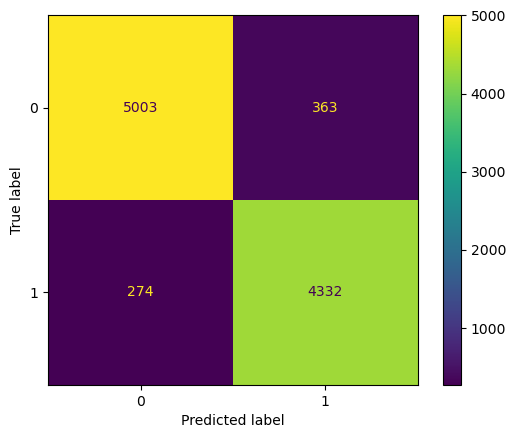

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5366
           1       0.92      0.94      0.93      4606

    accuracy                           0.94      9972
   macro avg       0.94      0.94      0.94      9972
weighted avg       0.94      0.94      0.94      9972



In [130]:
# 라이브러리 불러오기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# rfc 모델로 x_test를 예측한 값을 y_pred로 저장하기
y_pred = rfc.predict(x_test) 

# 실제값 le_y_test(레이블 인코딩을 해야 0,1로 표현됨)와 예측값 y_pred 비교하기
cm = confusion_matrix(le_y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

# 오차행렬(Confusion Matrix) 출력하기
plt.show() 

# 오차행렬(Confusion Matrix)를 통한 각종 지표들을 리포트로 출력하기
print(classification_report(le_y_test, y_pred)) 